# CAP4631C Machine Learning I
## Presentation 3
### Victor Roa - 10/07/2021

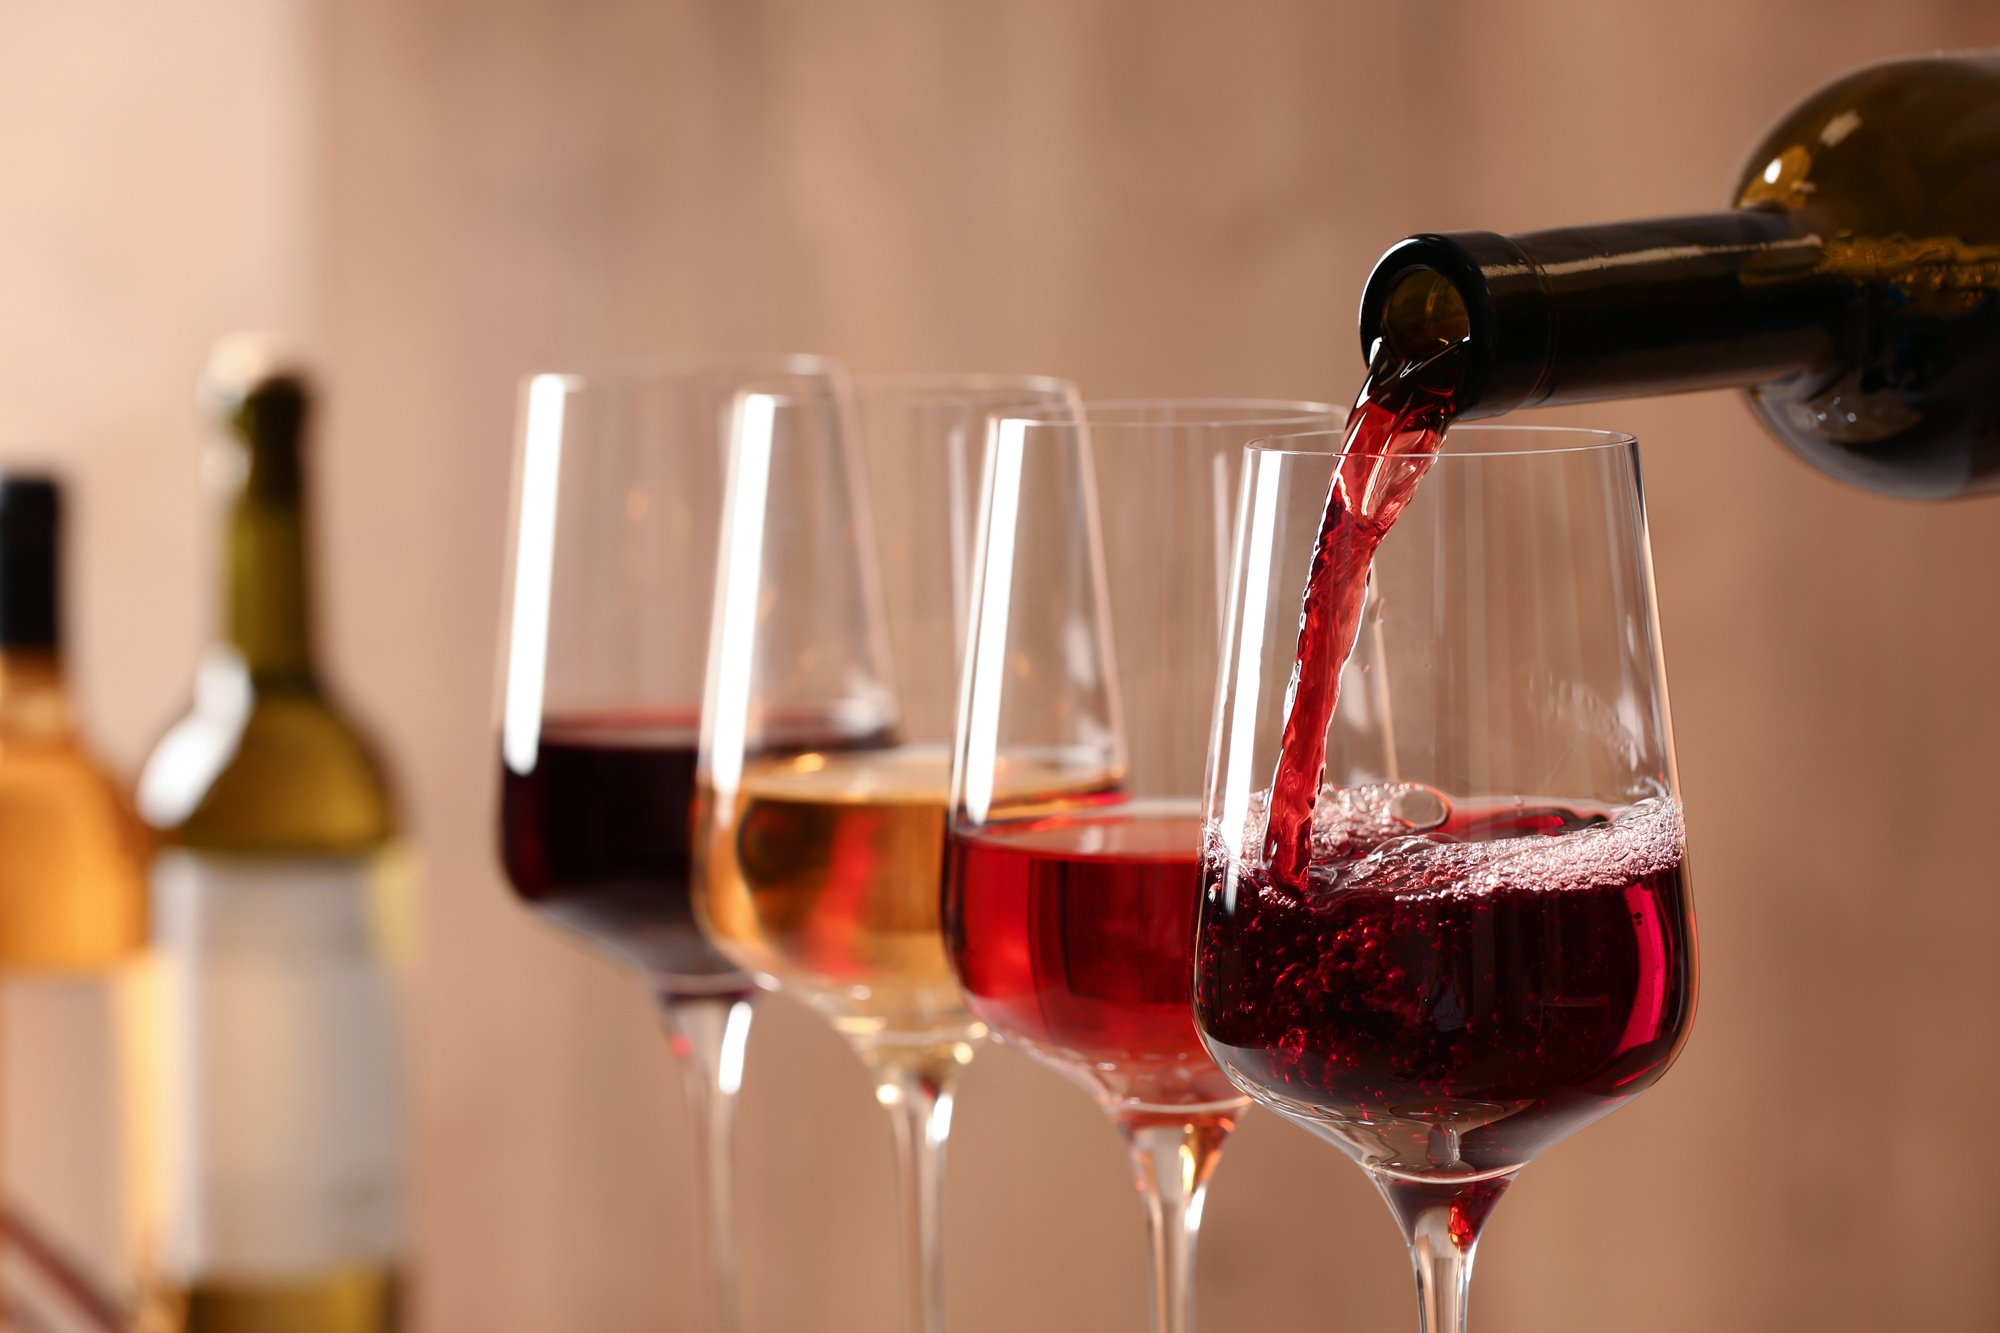

It's wine time. Using a wine dataset found in Kaggle, I will be applying logistic regression to predict the quality of a wine based in its chemical composition.

The first step is to import the libraries to be used.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
wine_df=pd.read_csv("winequality.csv")
wine_df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

In [3]:
wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [4]:
wine_df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Since the proportion of null values against the Total number of rows is too small, I decided to remove the nulls instead of calculating them using their median (Also because the acidity levels, chemical composition and pH can be really specific depending of the wine variety.)

In [5]:
wine_df= wine_df.dropna()
wine_df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6491       0.82      9.5        6  
6492       0.58     10.5        5  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6463 rows x 13 columns]

In [6]:
wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6463.000000       6463.000000  6463.000000     6463.000000   
mean        7.217755          0.339589     0.318758        5.443958   
std         1.297913          0.164639     0.145252        4.756852   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6463.000000          6463.000000           6463.000000  6463.000000   
mean      0.056056            30.516865            115.694492     0.994698   
std       0.035076            17.758815             56.526736     0.003001   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992330   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.997000   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6463.000000  6463.000000  6463.000000  6463.000000  
mean      3.218332     0.531150    10.492825     5.818505  
std       0.160650     0.148913     1.193128     0.873286  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


white    4870
red      1593
Name: type, dtype: int64

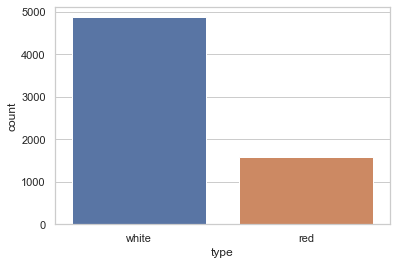

In [7]:

sns.countplot('type',data=wine_df)
wine_df['type'].value_counts()

We can notice that the data proportion between white and red wine is relevant, since we have aprox 3500 rows more about white wine than red wine. This could cause problems when predicting, but for now, let's keep them all.

<AxesSubplot:>

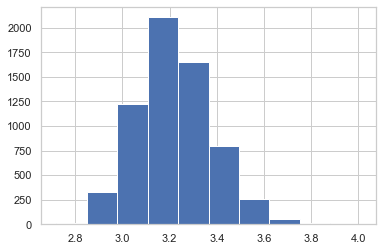

In [8]:
wine_df.pH.hist()


<AxesSubplot:>

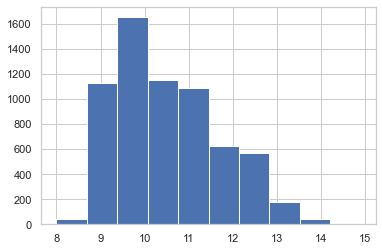

In [9]:
wine_df.alcohol.hist()

In [10]:
wine_df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

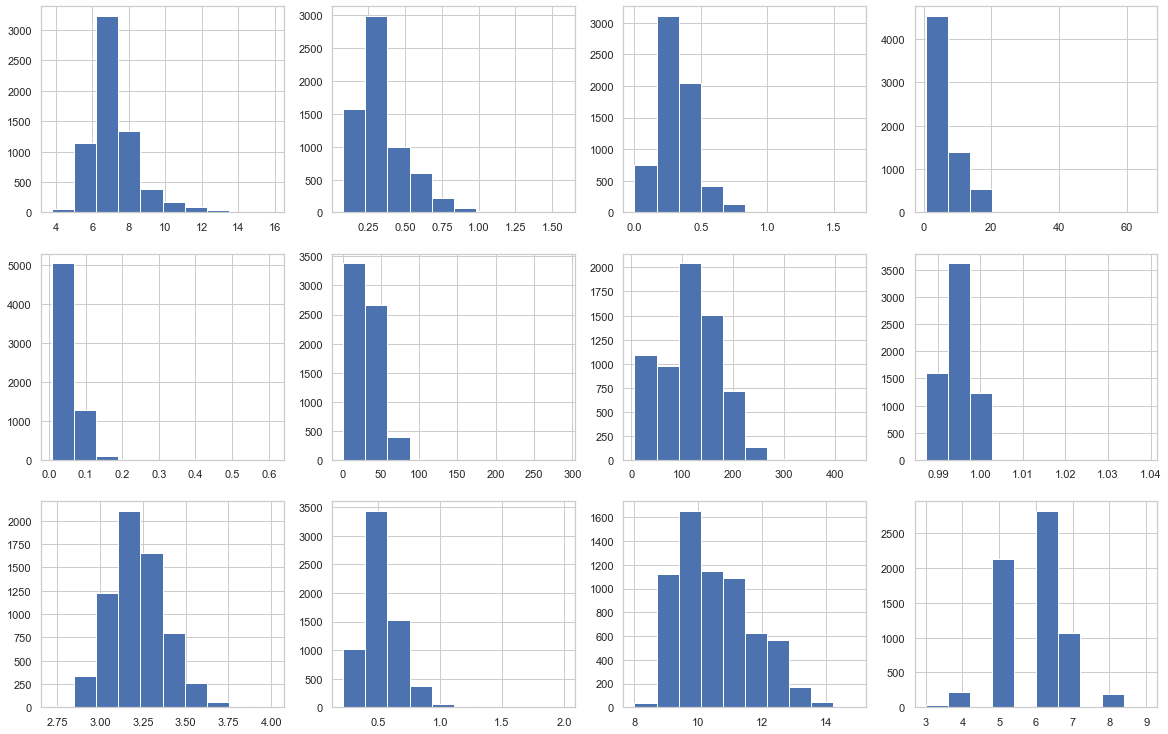

In [11]:
plt.figure(figsize = (20,22))
for i in range(1,13):
    plt.subplot(5,4,i)
    wine_df[wine_df.columns[i]].hist()
    

Checking correlation between the predictors

In [12]:
wine_df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.221066     0.323744   
volatile acidity           0.221066          1.000000    -0.377512   
citric acid                0.323744         -0.377512     1.000000   
residual sugar            -0.113442         -0.196677     0.142324   
chlorides                  0.299104          0.377995     0.039412   
free sulfur dioxide       -0.283485         -0.353402     0.132271   
total sulfur dioxide      -0.330543         -0.414729     0.194398   
density                    0.459713          0.272101     0.097068   
pH                        -0.251121          0.260134    -0.327860   
sulphates                  0.301263          0.225656     0.059070   
alcohol                   -0.096190         -0.039528    -0.010056   
quality                   -0.076174         -0.266677     0.084926   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.113442   0.299104            -0.283485   
volatile acidity           -0.196677   0.377995            -0.353402   
citric acid                 0.142324   0.039412             0.132271   
residual sugar              1.000000  -0.128814             0.403449   
chlorides                  -0.128814   1.000000            -0.195428   
free sulfur dioxide         0.403449  -0.195428             1.000000   
total sulfur dioxide        0.495684  -0.279602             0.721476   
density                     0.551494   0.363108             0.025113   
pH                         -0.266481   0.044653            -0.145164   
sulphates                  -0.185616   0.396240            -0.188947   
alcohol                    -0.359132  -0.257664            -0.179477   
quality                    -0.034654  -0.200553             0.054924   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.330543  0.459713 -0.251121   0.301263   
volatile acidity                 -0.414729  0.272101  0.260134   0.225656   
citric acid                       0.194398  0.097068 -0.327860   0.059070   
residual sugar                    0.495684  0.551494 -0.266481  -0.185616   
chlorides                        -0.279602  0.363108  0.044653   0.396240   
free sulfur dioxide               0.721476  0.025113 -0.145164  -0.188947   
total sulfur dioxide              1.000000  0.031419 -0.237204  -0.275878   
density                           0.031419  1.000000  0.012525   0.260019   
pH                               -0.237204  0.012525  1.000000   0.190864   
sulphates                        -0.275878  0.260019  0.190864   1.000000   
alcohol                          -0.264385 -0.687432  0.120473  -0.004116   
quality                          -0.041598 -0.304447  0.018403   0.039054   

                       alcohol   quality  
fixed acidity        -0.096190 -0.076174  
volatile acidity     -0.039528 -0.266677  
citric acid          -0.010056  0.084926  
residual sugar       -0.359132 -0.034654  
chlorides            -0.257664 -0.200553  
free sulfur dioxide  -0.179477  0.054924  
total sulfur dioxide -0.264385 -0.041598  
density              -0.687432 -0.304447  
pH                    0.120473  0.018403  
sulphates            -0.004116  0.039054  
alcohol               1.000000  0.444637  
quality               0.444637  1.000000

Using label_encoder, I converted the column type into categorical values (0 for red wine and 1 for white wine)

In [13]:

label_encoder = preprocessing.LabelEncoder()
wine_df['type']= label_encoder.fit_transform(wine_df['type'])
wine_df

<ipython-input-13-c6c51eab17dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_df['type']= label_encoder.fit_transform(wine_df['type'])


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1            7.0             0.270         0.36            20.7   
1        1            6.3             0.300         0.34             1.6   
2        1            8.1             0.280         0.40             6.9   
3        1            7.2             0.230         0.32             8.5   
4        1            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6491     0            6.8             0.620         0.08             1.9   
6492     0            6.2             0.600         0.08             2.0   
6494     0            6.3             0.510         0.13             2.3   
6495     0            5.9             0.645         0.12             2.0   
6496     0            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6491       0.82      9.5        6  
6492       0.58     10.5        5  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6463 rows x 13 columns]

Now I'm converting the expected output (quality) into a categorical value, when 0 takes a range from 0 to 5, and meaning "less quality" and 1 meaning "higher quality" taking a range from 6 to 10.

For this part, I tried to use a regular np.where to set a condition but I wasn't able to execute it, returning an error. I started googling it and I found the function pd.cut which helped me to create the categories based on the range established.

In [14]:
#wine_df['quality']= np.where(wine_df['quality']>=6, 1,0)

bins = [0,5,10]
labels = [0, 1]
wine_df['quality']= pd.cut(x=wine_df['quality'], bins=bins, labels=labels)
wine_df

<ipython-input-14-b8a47e6fa336>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_df['quality']= pd.cut(x=wine_df['quality'], bins=bins, labels=labels)


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1            7.0             0.270         0.36            20.7   
1        1            6.3             0.300         0.34             1.6   
2        1            8.1             0.280         0.40             6.9   
3        1            7.2             0.230         0.32             8.5   
4        1            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6491     0            6.8             0.620         0.08             1.9   
6492     0            6.2             0.600         0.08             2.0   
6494     0            6.3             0.510         0.13             2.3   
6495     0            5.9             0.645         0.12             2.0   
6496     0            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol quality  
0          0.45      8.8       1  
1          0.49      9.5       1  
2          0.44     10.1       1  
3          0.40      9.9       1  
4          0.40      9.9       1  
...         ...      ...     ...  
6491       0.82      9.5       1  
6492       0.58     10.5       0  
6494       0.75     11.0       1  
6495       0.71     10.2       0  
6496       0.66     11.0       1  

[6463 rows x 13 columns]

In [15]:
wine_df.dtypes

type                       int32
fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

Now, let's start building the logistic model, setting X,Y and the training and testing datasets

In [19]:
X=wine_df.drop('quality',1)
y=wine_df['quality']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [30]:
wine_lr = LogisticRegression()
wine_lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
wine_lr = LogisticRegression(solver='lbfgs', max_iter=10000)
wine_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [32]:
y_pred= wine_lr.predict(X_test)

d = {'Y': y_test, 'Y predicted': y_pred}
y_comp= pd.DataFrame(d)
y_comp


Y  Y predicted
2076  0            0
1877  1            1
1778  1            1
1782  1            1
6276  1            0
...  ..          ...
4812  1            1
3311  1            1
1327  1            1
4330  0            1
1784  1            1

[1293 rows x 2 columns]

In [33]:
from sklearn import metrics 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.58      0.63       475
           1       0.78      0.84      0.81       818

    accuracy                           0.75      1293
   macro avg       0.73      0.71      0.72      1293
weighted avg       0.74      0.75      0.74      1293



According to the classification report, we can see that the model got an accuracy of 75%, and then, looking at the confusion matrix, we can notice that the model were able to predict the 1 (higher quality) better than the 0 (low quality)


Confusion Matrix: 



Text(30.5, 0.5, 'True')

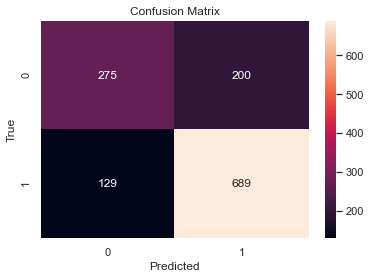

In [34]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix: \n")
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

Finally just to check if the red wine scarcity of data is affecting our model, I decided to run another logistic model using only the white wine data.

In [38]:
whitewine_df= wine_df[wine_df['type']==1]
whitewine_df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1            7.0              0.27         0.36            20.7   
1        1            6.3              0.30         0.34             1.6   
2        1            8.1              0.28         0.40             6.9   
3        1            7.2              0.23         0.32             8.5   
4        1            7.2              0.23         0.32             8.5   
...    ...            ...               ...          ...             ...   
4891     1            5.7              0.21         0.32             0.9   
4893     1            6.2              0.21         0.29             1.6   
4894     1            6.6              0.32         0.36             8.0   
4896     1            5.5              0.29         0.30             1.1   
4897     1            6.0              0.21         0.38             0.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
4891      0.038                 38.0                 121.0  0.99074  3.24   
4893      0.039                 24.0                  92.0  0.99114  3.27   
4894      0.047                 57.0                 168.0  0.99490  3.15   
4896      0.022                 20.0                 110.0  0.98869  3.34   
4897      0.020                 22.0                  98.0  0.98941  3.26   

      sulphates  alcohol quality  
0          0.45      8.8       1  
1          0.49      9.5       1  
2          0.44     10.1       1  
3          0.40      9.9       1  
4          0.40      9.9       1  
...         ...      ...     ...  
4891       0.46     10.6       1  
4893       0.50     11.2       1  
4894       0.46      9.6       0  
4896       0.38     12.8       1  
4897       0.32     11.8       1  

[4870 rows x 13 columns]

In [39]:
X=whitewine_df.drop('quality',1)
y=whitewine_df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [41]:
whwine_lr = LogisticRegression(solver='lbfgs', max_iter=10000)
whwine_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [43]:
y_pred= whwine_lr.predict(X_test)
d = {'Y': y_test, 'Y predicted': y_pred}
y_comp= pd.DataFrame(d)
y_comp

Y  Y predicted
2432  0            1
2474  1            1
1528  1            1
2090  0            0
4029  1            1
...  ..          ...
1284  1            1
1811  0            0
2807  0            0
2324  0            0
2173  0            0

[974 rows x 2 columns]


Confusion Matrix: 



Text(30.5, 0.5, 'True')

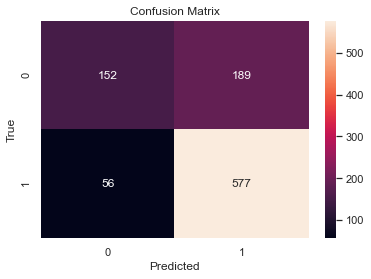

In [45]:
print("\nConfusion Matrix: \n")
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.45      0.55       341
           1       0.75      0.91      0.82       633

    accuracy                           0.75       974
   macro avg       0.74      0.68      0.69       974
weighted avg       0.75      0.75      0.73       974



Here we can see that there is not a big difference in prediction accuracy when removing the red wine data.

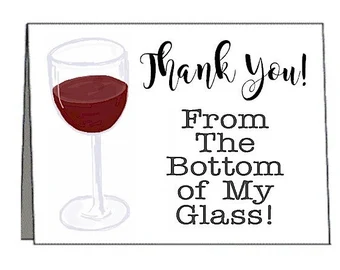
Victor.